In [256]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from IPython.display import Image
from IPython import display
%matplotlib inline
from tsp_solver.greedy import solve_tsp


In [282]:
class TravellingSalesMan:
    def __init__(self,_no_of_neurons,
                 _lattice_radius,
                 _lattice_center,
                 _eta,
                 _no_epochs):
        
        self.no_of_neurons = _no_of_neurons
        self.lattice_radius = _lattice_radius
        self.lattice_center = _lattice_center
        self.eta = _eta
        self.no_of_epochs = _no_epochs
        
        self.current_weights = self.points_in_circle()
        self.cities = self.get_cities()
        print self.cities
        self.city_labels = ['bonn','cologne','greifswald','neubrandenberg', 
                       'rostock','schwerin'
                       ]
    '''
    find euclidean distance between two coordinates
    '''
    def euclidean_distance_2d(self,x, y):
#         print "x ", x
#         print "y ", y
        return math.sqrt(pow(y[0]-x[0],2) + pow(y[1]-x[1],2))
    
    '''
    find euclidean distance between given input 
    and all neurons weight, and return winning neuron 
    with shortest distance 
    '''
    def get_winner(self,x):
        return min([(self.euclidean_distance_2d(x,w),index) 
                   for index,w in enumerate(self.current_weights)])[1]
        
    def get_cities(self):
        return np.array([[ 58.,          52.        ],
                         [ 55.,          57.19615242],
                         [ 49.,          57.19615242],
                         [ 46.,          52.        ],
                         [ 49.,          46.80384758],
                         [ 55.,          46.80384758]])

    
    def compute_distance_for_TspSolve(self):
        
        a = self.get_cities()
        dist = np.zeros((0,a.shape[0]))
        for i in range(a.shape[0]):
            euclidean = []
            for j in a:
                euclidean.append(tsm.euclidean_distance_2d(a[i],j))
            dist = np.vstack((dist, np.hstack((euclidean))))
        return dist
    
    def plot_cities(self):
        #city labels

        
        #getting x,y coordinates of cities
        cities_x = self.cities[:,0:1]
        cities_y = self.cities[:,1:2]
        
        #configuration for plot
        fig, ax = plt.subplots()
        plt.xlim([1,120])
        plt.ylim([1,120])
        plt.xlabel("x co-ordinate of city")
        plt.ylabel("y co-ordinate of city")
        fig.set_figheight(9)
        fig.set_figwidth(15)
        
        ax.plot(cities_x, cities_y,'ro')

        ax.plot(self.current_weights[:,0:1],self.current_weights[:,1:2],'bo')  
        
        
        #showing name of the cities in the plot
        for i, label in enumerate(self.city_labels):
            ax.annotate(label, (cities_x[i]+1,cities_y[i]+1))
        
            
        #showing name of the neurons in the plot
#         print current_weights
        for index, weight in enumerate(self.current_weights):
            ax.annotate(index, (weight[0]+0.5,weight[1]+1.5))
            
    def points_in_circle(self):
        points = np.empty((0,2))
        circle_center = self.lattice_center
        radius = self.lattice_radius
        n = self.no_of_neurons
        for x in xrange(0,n+1):
            point = [circle_center[0]+np.cos(2*np.pi/n*x)*radius,
                     circle_center[1]+np.sin(2*np.pi/n*x)*radius]
            points = np.vstack([points,point])
        return points   
    
    def weight_adaptation(self,index,x):
        current_weight = self.current_weights[index]
        new_weight = (current_weight + (self.eta*(x-current_weight)))
        self.current_weights[index] = new_weight
        return True
    
    def eta_update(self,n):
        self.eta = self.eta*np.exp(-n/self.no_of_epochs)
    
    def train(self):
        for epoch in range(self.no_of_epochs):
            for city in self.cities: 
                winner_neuron = self.get_winner(city)
                self.weight_adaptation(winner_neuron,city)
                self.eta_update(epoch)

[[ 58.          52.        ]
 [ 55.          57.19615242]
 [ 49.          57.19615242]
 [ 46.          52.        ]
 [ 49.          46.80384758]
 [ 55.          46.80384758]]
points after training


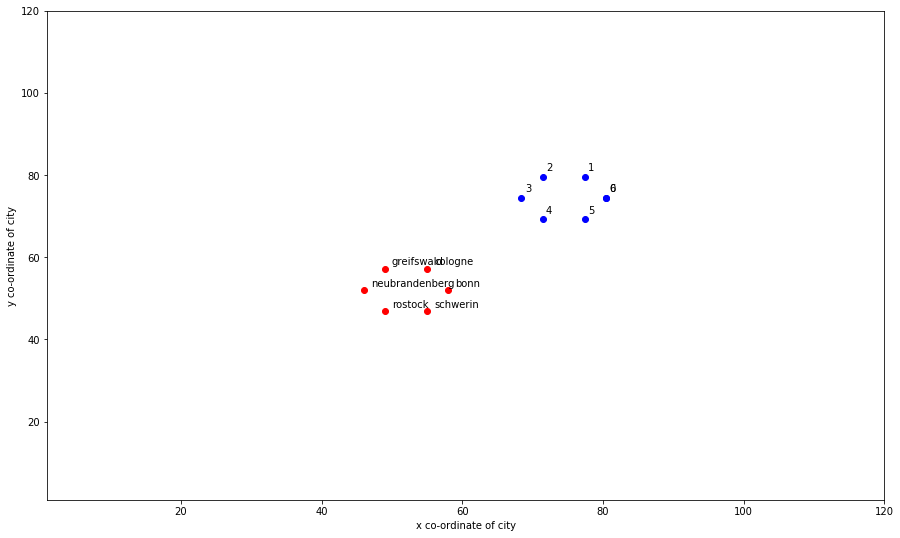

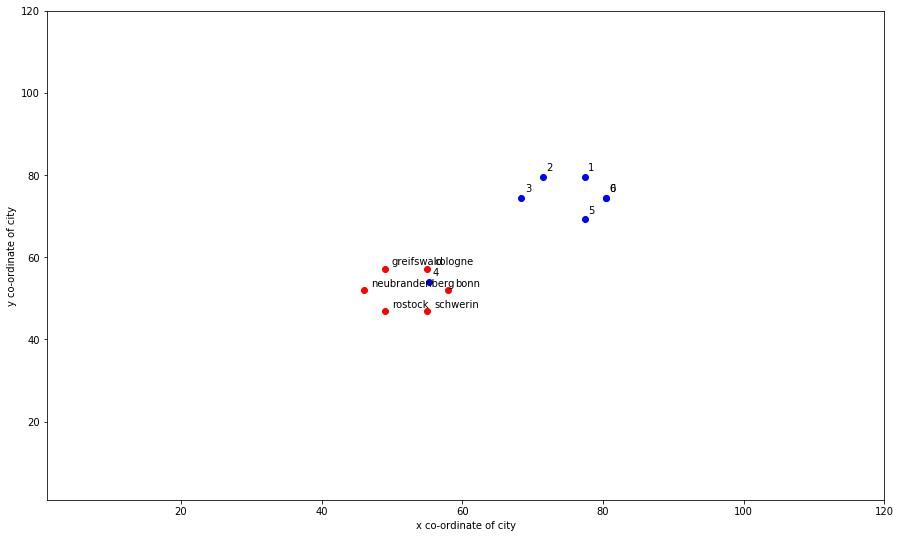

In [284]:
no_of_neurons = 6
lattice_radius = 6
temp = np.random.uniform(10.0,80.0)
lattice_center = (temp,temp)
eta = 1
no_of_epochs = 10000

tsm = TravellingSalesMan(no_of_neurons,
                        lattice_radius,
                        lattice_center,eta,
                        no_of_epochs)

points = tsm.plot_cities()
tsm.train()
print "points after training"
points = tsm.plot_cities()

# Path using TSP library



In [285]:
#compute path using TSP solve library
distances = tsm.compute_distance_for_TspSolve()
print distances
paths = solve_tsp(distances)

# print "Cties are travelled in ", paths

print "Cities are travelled in order "
for path in paths:
    print " >> " + str(tsm.city_labels[path]),

[[  0.           6.          10.39230484  12.          10.39230484   6.        ]
 [  6.           0.           6.          10.39230484  12.          10.39230484]
 [ 10.39230484   6.           0.           6.          10.39230484  12.        ]
 [ 12.          10.39230484   6.           0.           6.          10.39230484]
 [ 10.39230484  12.          10.39230484   6.           0.           6.        ]
 [  6.          10.39230484  12.          10.39230484   6.           0.        ]]
Cities are travelled in order 
 >> rostock  >> neubrandenberg  >> greifswald  >> cologne  >> bonn  >> schwerin


<IPython.core.display.Javascript object>


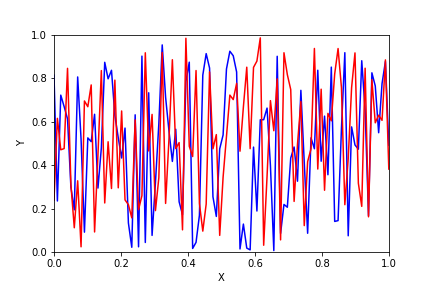

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


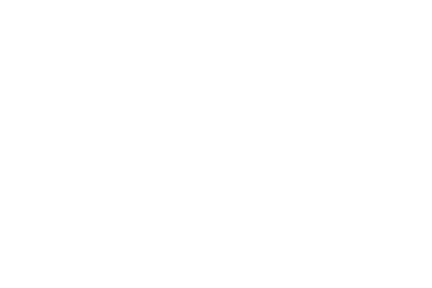

In [81]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(50):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)